# Plotting

This notebook will plot the court, shot chart data, tracking data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting Shot Chart Shots

In [5]:
bos_shots = pd.read_csv("Data_supplement/Shot_zones/bos_shot_1617.csv")

In [22]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

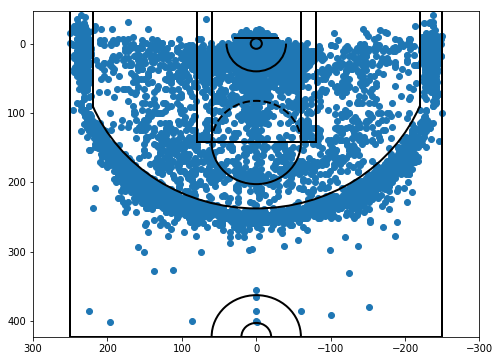

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(bos_shots.LOC_X, bos_shots.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.ylim(422.5, -47.5)
plt.show()

# Plotting Tracking Data

In [13]:
path_tracking = "Basketball/Player_Tracking/CLEBOS/2017051702_nba-bos_TRACKING.jsonl.gz"
tracking = pd.read_json(path_tracking, lines=True,
                        compression='gzip', encoding='latin1')

In [77]:
tracking.iloc[435,:]

awayPlayers         [{'playerId': 'ff41e9f0-89ef-11e6-87b7-a45e60e...
ball                      {'xyz': [-4.04, 24.39, 0.9400000000000001]}
frameIdx                                                          638
gameClock                                                         710
gameClockStopped                                                 True
homePlayers         [{'playerId': 'ff427c2e-89ef-11e6-8d2a-a45e60e...
period                                                              1
shotClock                                                          14
wallClock                                               1495067574393
ball_x                                                          -4.04
ball_y                                                          24.39
Name: 435, dtype: object

In [82]:
def get_x(dict):
    return dict['xyz'][0]

def get_y(dict):
    return dict['xyz'][1]

def get_z(dict):
    val = 0
    try:
        val = dict['xyz'][2]
    except:
        pass
    return val

tracking['ball_x'] = tracking['ball'].apply(get_x)
tracking['ball_y'] = tracking['ball'].apply(get_y)
tracking['ball_z'] = tracking['ball'].apply(get_z)
# t = tracking['ball']['xyz']

In [83]:
tracking.head()

,awayPlayers,ball,frameIdx,gameClock,gameClockStopped,homePlayers,period,shotClock,wallClock,ball_x,ball_y,ball_z
0,[{'playerId': 'ff41e9f0-89ef-11e6-87b7-a45e60e...,"{'xyz': [1.73, 8.9, 5.29]}",0,720.0,True,[{'playerId': 'ff427c2e-89ef-11e6-8d2a-a45e60e...,1,24.0,1495067548874,1.73,8.90,5.29
1,[{'playerId': 'ff41e9f0-89ef-11e6-87b7-a45e60e...,"{'xyz': [1.83, 8.9, 5.39]}",1,720.0,True,[{'playerId': 'ff427c2e-89ef-11e6-8d2a-a45e60e...,1,24.0,1495067548914,1.83,8.90,5.39
2,[{'playerId': 'ff41e9f0-89ef-11e6-87b7-a45e60e...,"{'xyz': [1.83, 8.83, 5.26]}",2,720.0,True,[{'playerId': 'ff427c2e-89ef-11e6-8d2a-a45e60e...,1,24.0,1495067548955,1.83,8.83,5.26
3,[{'playerId': 'ff41e9f0-89ef-11e6-87b7-a45e60e...,"{'xyz': [1.94, 8.83, 5.34]}",3,720.0,True,[{'playerId': 'ff427c2e-89ef-11e6-8d2a-a45e60e...,1,24.0,1495067548994,1.94,8.83,5.34
4,[{'playerId': 'ff41e9f0-89ef-11e6-87b7-a45e60e...,"{'xyz': [1.98, 8.91, 5.29]}",4,720.0,True,[{'playerId': 'ff427c2e-89ef-11e6-8d2a-a45e60e...,1,24.0,1495067549035,1.98,8.91,5.29


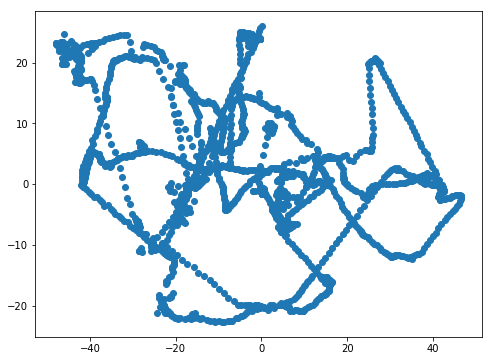

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(tracking.ball_x[0:2000], tracking.ball_y[0:2000])

As we can see:

- Shot chart details uses Feet*10 as units
- tracking data uses Feet as units
- shot chart details has half court range
- tracking data has full court range

We will need to convert tracking data units and orientation into that of shot chart details